In [25]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [26]:
!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.4/78.2 GB disk)


In [27]:
from ultralytics import YOLO

from IPython.display import display, Image

In [28]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow

rf = Roboflow(api_key="ZsZB2FnCmcNaslwIlejv")
project = rf.workspace("mydatasets-bqwxe").project("booksandcarssegmentation")
dataset = project.version(1).download("yolov8")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.28, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to BooksAndCarsSegmentation-1 in yolov8:: 100%|██████████| 192/192 [00:00<00:00, 689.10it/s]


## Training

In [29]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8n-seg.pt data={dataset.location}/data.yaml epochs=300 imgsz=640

/content
Ultralytics YOLOv8.0.28 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/datasets/BooksAndCarsSegmentation-1/data.yaml, epochs=300, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic

In [33]:
from time import sleep

while True:
    
    sleep(10)

KeyboardInterrupt: ignored

/content


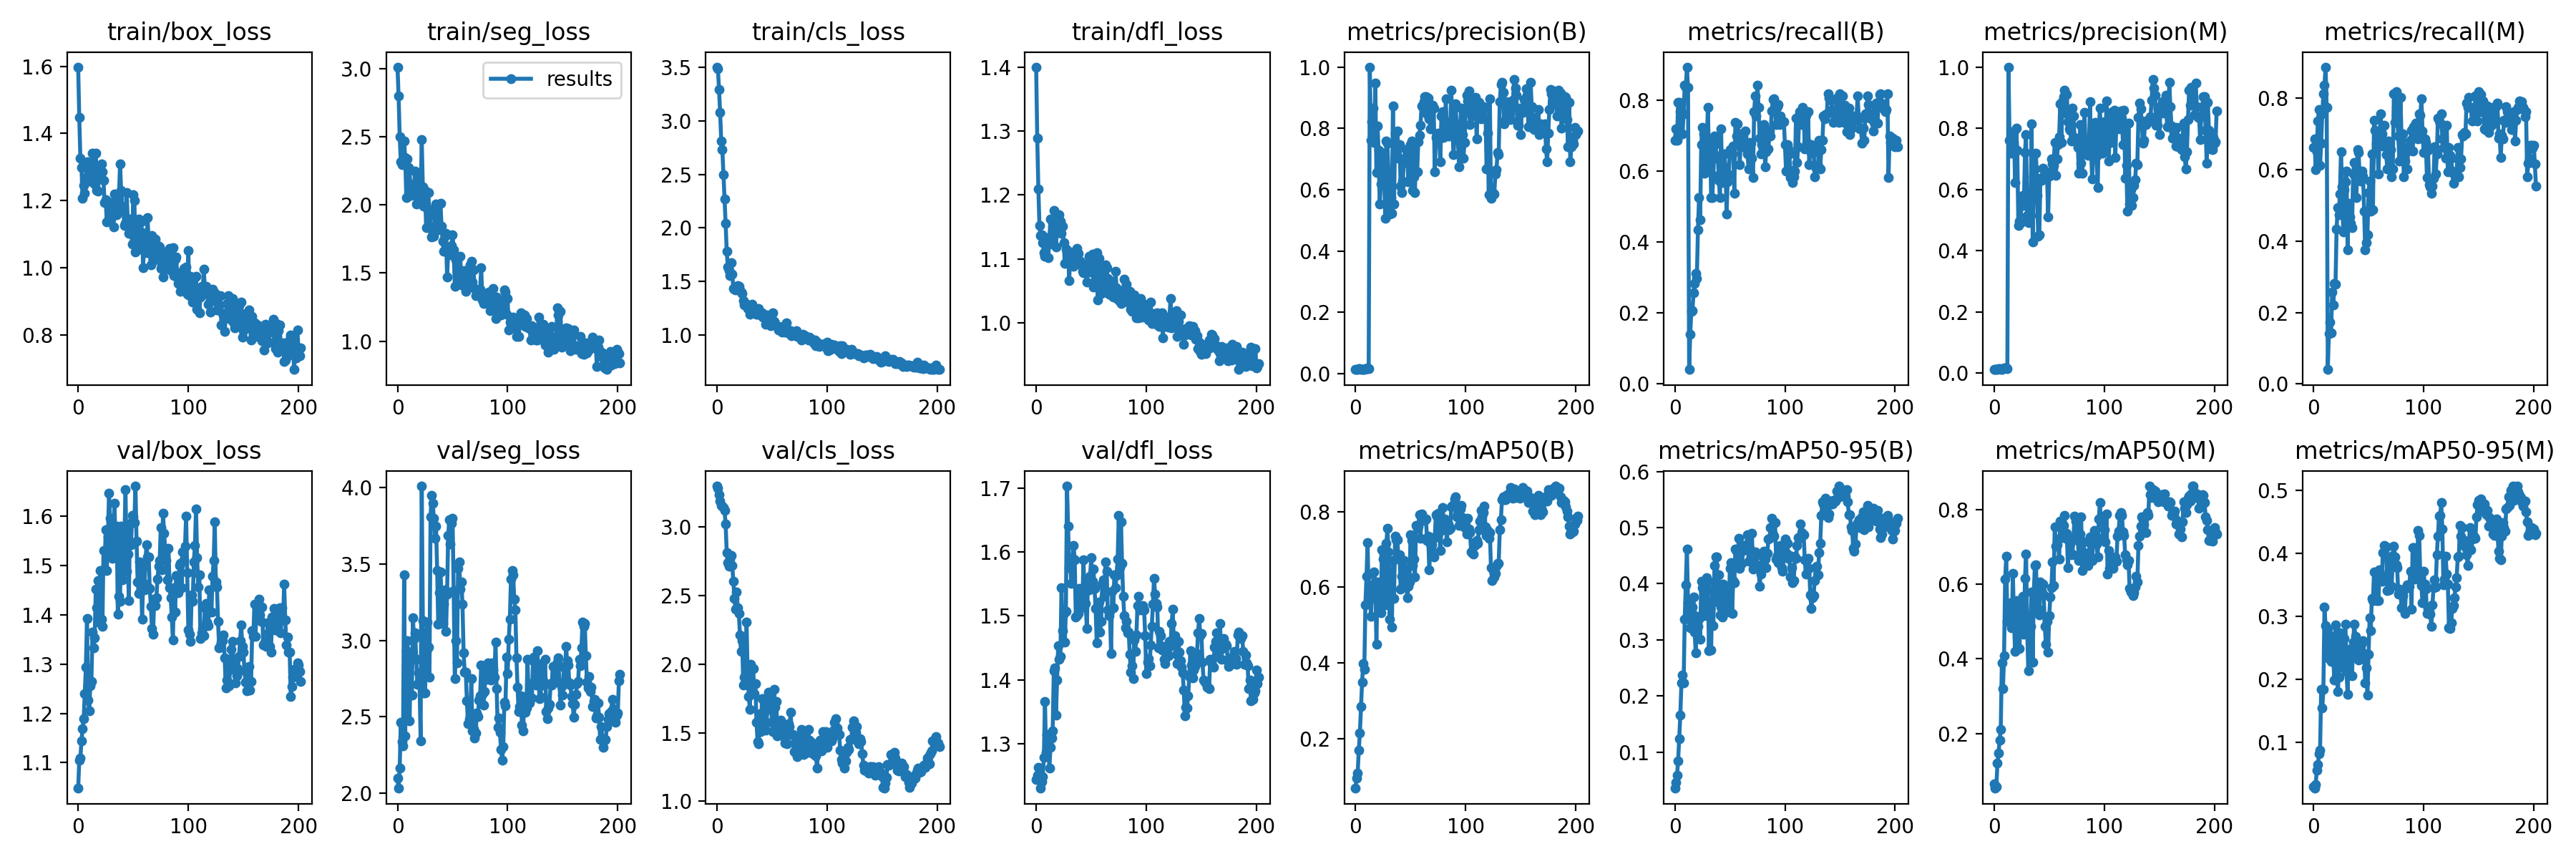

In [34]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train3/results.png', width=600)

In [37]:
!ls {HOME}/runs/segment/train3/

args.yaml					    train_batch0.jpg
events.out.tfevents.1682612732.22061af4bc87.8196.0  train_batch1.jpg
results.csv					    train_batch2.jpg
results.png					    weights


In [35]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train3/val_batch0_pred.jpg', width=600)

/content


FileNotFoundError: ignored

## Validation

In [36]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train3/weights/best.pt data={dataset.location}/data.yaml

/content
2023-04-27 17:45:49.702463: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-27 17:45:50.554489: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258454 parameters, 0 gradients, 12.0 GFLOPs
val: Scanning /content/datasets/BooksAndCarsSegmentation-1/valid/labels.cache... 6 images, 0 backgrounds, 0 corrupt: 100% 6/6 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.98it/s]
                   all          6         36      0.853      0.812      

## mAP, Speed, Size

- **mAP50-95:** 0.489

- **mAP50:** 0.839

- **Speed of inference:** 12.6 ms (27.8 ms with post-processing)

- **Model Size:** 6.5 MB

In [ ]:
"""
Class     Images  Instances  Mask(P          R          mAP50      mAP50-95)
all          6         36         0.853      0.812      0.839      0.489
book         6         16         0.831      0.924      0.931       0.57
car          6         20         0.874        0.7      0.747      0.409

...

Speed: 0.3ms pre-process, 12.6ms inference, 0.0ms loss, 14.9ms post-process per image
"""